

# HW 2: Analyzing IMDb Data

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

The csv data can be downloaded from https://drive.google.com/open?id=12oQVUx8gGsdruEi4iJB-KFvxLt3znK-l for your offline use purpose

## Part 1

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'12oQVUx8gGsdruEi4iJB-KFvxLt3znK-l'}) # replace the id with id of file you want to access
downloaded.GetContentFile('imdb_1000.csv') 

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [6]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [7]:
# Answer:
round(movies['duration'].mean(), 4)

120.9796

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [8]:
# Answer:
movies.sort_values(by='duration', inplace = True)
movies.iloc[[0,-1],:]

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [9]:
# Alternate method
print('Longest Movie: ', movies.iloc[movies['duration'].idxmax()])
print('Shortest Movie: ', movies.iloc[movies['duration'].idxmin()])

Longest Movie:  star_rating                                                     8.6
title                                             Life Is Beautiful
content_rating                                                PG-13
genre                                                        Comedy
duration                                                        116
actors_list       [u'Roberto Benigni', u'Nicoletta Braschi', u'G...
Name: 25, dtype: object
Shortest Movie:  star_rating                                                     7.5
title                                                         Smoke
content_rating                                                    R
genre                                                        Comedy
duration                                                        112
actors_list       [u'Harvey Keitel', u'William Hurt', u'Giancarl...
Name: 912, dtype: object


#### Create a histogram of duration, choosing an "appropriate" number of bins.

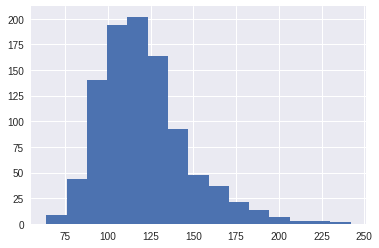

In [10]:
# Answer:
movies['duration'].hist(bins=15)
plt.show()

#### Use a box plot to display that same data.

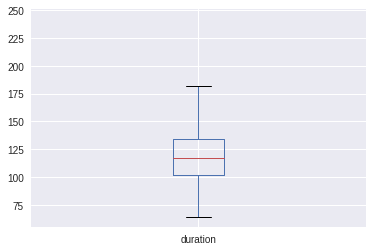

In [11]:
# Answer:
movies['duration'].plot(kind='box')
plt.show()

## Part 2

#### Count how many movies have each of the content ratings.

In [12]:
# Answer:
value_counts_ratings = movies['content_rating'].value_counts()
value_counts_ratings

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'No. of movies')

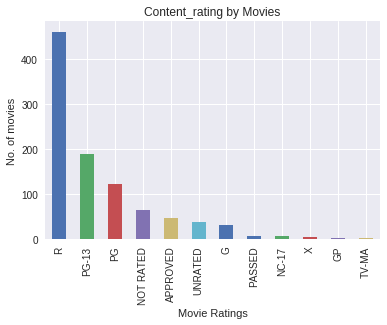

In [13]:
# Answer:
ax = value_counts_ratings.plot(title="Content_rating by Movies", kind="bar")
ax.set_xlabel('Movie Ratings')
ax.set_ylabel('No. of movies')

# movies.content_rating.value_counts().plot(kind='bar', title='Top 1000 Movies by Content Rating')
# plt.xlabel('Content Rating')
# plt.ylabel('Number of Movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [0]:
# Answer:
movies['content_rating'] = ['UNRATED' if ( (x =='NOT RATED') | (x =='APPROVED') | (x =='PASSED') | (x =='GP')) else x for x in movies['content_rating']]

In [15]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [0]:
# Answer:
movies['content_rating'] = ['NC-17' if ( (x =='X') | (x =='TV-MA')) else x for x in movies['content_rating']]

In [17]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

In [18]:
movies['content_rating'].unique()

array(['UNRATED', 'R', 'G', 'PG', 'PG-13', 'NC-17', nan], dtype=object)

#### Count the number of missing values in each column.

In [19]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [20]:
# Answer:
movies[pd.isnull(movies).any(axis=1)]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


In [0]:
# movies['content_rating'] = ['UNRATED' if pd.isnull(x) else x for x in movies['content_rating']]
# (OR)
movies['content_rating'].fillna('UNRATED', inplace=True)

In [22]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [23]:
# Answer:
print('Mean of star_rating of movies 2 hours or longer', movies[movies['duration']>=120]['star_rating'].mean())
print('Mean of star_rating of movies shorter than 2 hours ', movies[movies['duration']<120]['star_rating'].mean())

Mean of star_rating of movies 2 hours or longer 7.948898678414094
Mean of star_rating of movies shorter than 2 hours  7.838666666666663


#### Use a visualization to detect whether there is a relationship between duration and star rating.

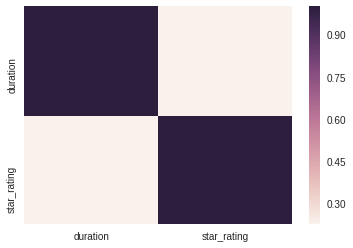

In [24]:
# Answer:
sns.heatmap(movies[['duration','star_rating']].corr())
plt.show()

There is less than 20% correlation between duration and star rating.

#### Calculate the average duration for each genre.

In [25]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Part 3

#### Visualize the relationship between content rating and duration.

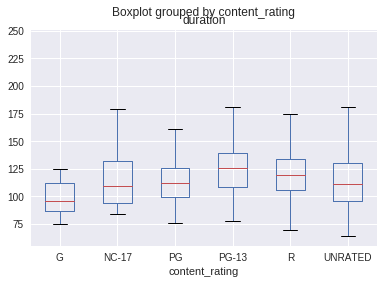

In [26]:
# Answer:
movies.boxplot(column='duration', by='content_rating')
plt.show()

In [27]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,UNRATED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,UNRATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


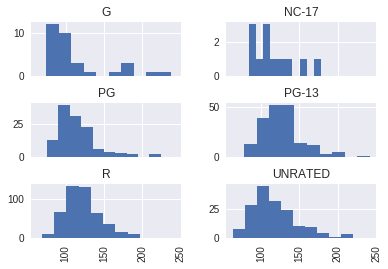

In [28]:
# Alternate method
movies.duration.hist(by=movies.content_rating, sharex=True)
plt.show()

#### Determine the top rated movie (by star rating) for each genre.

In [29]:
# Answer:
movies.sort_values('star_rating', ascending=False).groupby('genre').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
38,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [30]:
# Answer:
dupe_titles = movies[movies['title'].duplicated(False)]
dupe_titles
# movies[movies['title'].isin(dupe_titles['title'])]

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."


They are not duplicates, Though the movies have same title but the duration and Actors vary.

In [31]:
# Alternate method
titlesGreaterThanOne = movies['title'].value_counts()[movies['title'].value_counts() > 1].index
movies[movies['title'].isin(titlesGreaterThanOne)]

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [32]:
# Answer:
movies['genre'].value_counts()
genres = ['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
movies[movies.genre.isin(genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [33]:
# Answer:
genres = movies['genre'].value_counts()
top_genres = genres[genres >= 10].index
movies[movies.genre.isin(top_genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [34]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies['genre'].value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [35]:
# Answer:
genre_ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [36]:
from collections import Counter
Actors_list=[]
for i in movies['actors_list']:
  i = i.replace('[','').replace('u\'','').replace(']','').replace('\'','').replace('u\"','').replace('\"','')
  i = (i.split(','))
  Actors_list += i
  
# print(Actors_list)

# Actors_dict_counts = sorted([x, Actors_list.count(x)]) {i:Actors_list.count(i) for i in Actors_list}

Actors_dict_counts = Counter(Actors_list).most_common()
print('A List of Top 30 Actors along with the number of movies they acted in descending order of count:')
Actors_dict_counts[:30]



A List of Top 30 Actors along with the number of movies they acted in descending order of count:


[('Robert De Niro', 13),
 ('Tom Hanks', 12),
 ('Clint Eastwood', 11),
 ('Al Pacino', 10),
 ('Johnny Depp', 10),
 ('James Stewart', 9),
 ('Christian Bale', 9),
 ('Brad Pitt', 9),
 ('Leonardo DiCaprio', 9),
 (' Ed Harris', 8),
 ('Dustin Hoffman', 8),
 ('Denzel Washington', 8),
 ('Cary Grant', 7),
 ('Jake Gyllenhaal', 7),
 (' Julianne Moore', 7),
 ('Humphrey Bogart', 7),
 (' Emma Watson', 7),
 ('Robert Downey Jr.', 7),
 (' Michael Caine', 7),
 (' Robert Duvall', 7),
 ('Sean Connery', 7),
 ('Daniel Radcliffe', 7),
 (' Rupert Grint', 7),
 (' John Goodman', 6),
 (' Kate Winslet', 6),
 (' Jennifer Connelly', 6),
 (' Matt Damon', 6),
 (' Scarlett Johansson', 6),
 (' Ian McKellen', 6),
 ('Kevin Costner', 6)]